In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/BME574`


In [2]:
Pkg.add(["Random","Plots","FFTW"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/BME574/Project.toml`
  No Changes to `~/BME574/Manifest.toml`


In [3]:
using Random, Plots, FFTW

In [11]:
dt = 0.001
t = 0:dt:1
fs = sin.(2*pi*50*t)+sin.(2*pi*120*t) #sum of two frequencies
fn = fs+2.5*randn(length(t)) #add some noise

1001-element Vector{Float64}:
  0.6789622011609864
  3.120492654399709
 -4.8239196279205
  0.7930754105148334
  5.313569066230056
 -1.8026206978530877
  3.4631686422488115
 -1.8346392891367653
  0.4619979096907376
  0.2778097913772577
 -1.2191613874276697
  4.489862106770475
 -2.148594970658891
  ⋮
 -0.8510901825793127
 -2.486150834787808
 -1.7046839570939074
 -2.7987316254017545
 -0.20706871946545208
 -0.7250266310692167
 -0.6397573078444555
 -0.1005661105756992
 -0.7179746926758461
 -3.244728365218093
  0.0246385456393603
 -0.23816688903555927

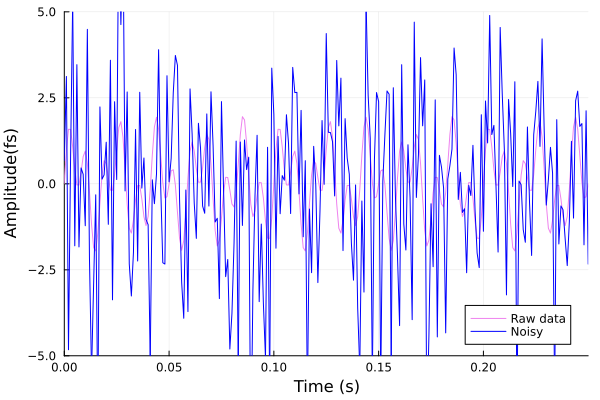

In [42]:
plot(t, fs, label = "Raw data", color = :violet, xlabel = "Time (s)", ylabel = "Amplitude(fs)", xlim = (0,0.25), ylim =  (-5,5)) 
plot!(t, fn, label = "Noisy", color = :blue)

In [30]:
n = length(t)
fhat =fft(fn) #compute the fast Fourier transform
PSD = abs.(fhat.*conj.(fhat/n)) #power per frequency (clean)
freq = (0:n-1)/(dt*n) #y-axis frequency

0.0:0.9990009990009989:999.000999000999

In [31]:
L =1:div(n,2) #only plot the first half of freqs
indicies = PSD.>100 #find all freqs with large power
PSDclean = PSD.*indicies #zero out all others
fhat_filtered= fhat.*indicies #zero out small Fourier coeffs.
f_filtered = real(ifft(fhat_filtered)) #Inverse FFT for filtered time signal

1001-element Vector{Float64}:
  0.16965674592955807
  0.9884178657106808
  1.3155147560188305
  1.0938970108901052
  0.5474603458736571
  0.04975242866074014
 -0.08573940448708402
  0.22048604160464325
  0.7703258511783152
  1.1984207136097011
  1.1764572250350334
  0.6002428819196587
 -0.34258267895442324
  ⋮
 -0.013866167105332467
 -0.5470239389109357
 -0.5880657821342845
 -0.23113856803548752
  0.20650030658132565
  0.36825773658611494
  0.06283840505687936
 -0.6221198154709299
 -1.3598794003388692
 -1.757095079032571
 -1.5660589542359622
 -0.8219228641045534

In [34]:
fft_filtered = fft(f_filtered)  #FFT of the filtered signal
PSD_filtered = abs.(fft_filtered .* conj.(fft_filtered)) / n  #PSD for filtered signal

1001-element Vector{Float64}:
 1.457676201620974e-32
 2.0392329563336145e-32
 1.141759148945186e-31
 1.1430399405743394e-32
 1.596146836440189e-33
 2.2903124364626093e-33
 8.587344306815352e-32
 1.7161770132867063e-32
 1.6666224748116486e-32
 9.419532034420363e-33
 4.8218303651917685e-32
 5.491486946639729e-32
 7.184819166275416e-33
 ⋮
 7.184819166275408e-33
 2.0644280703532662e-31
 1.687451196382421e-33
 9.41953203442036e-33
 1.666622474811648e-32
 1.7161770132867063e-32
 8.587344306815352e-32
 2.2903124364626103e-33
 1.5961468364401893e-33
 3.2217206608742917e-31
 2.1395619072807275e-32
 2.0392329563336147e-32

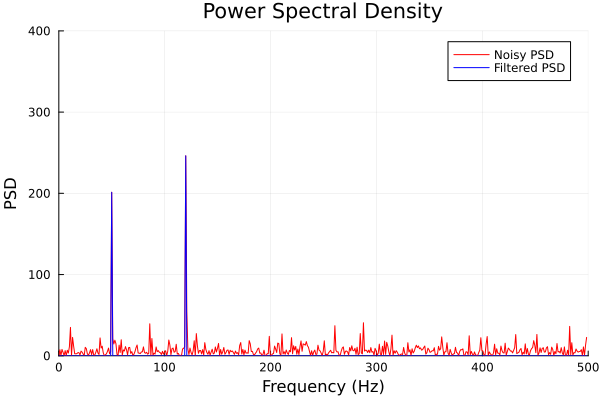

In [43]:
plot(freq[L], PSD[L], label = "Noisy PSD", color = :red, xlabel = "Frequency (Hz)", ylabel = "PSD", ylim = (0, 400), xlim = (0, 500))
plot!(freq[L], PSD_filtered[L], label = "Filtered PSD",color = :blue, title = "Power Spectral Density")

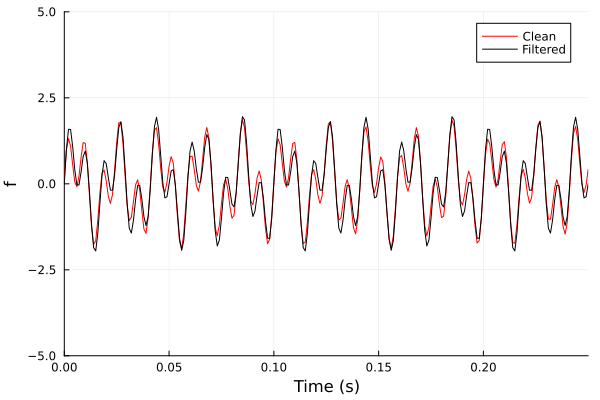

In [44]:
plot(t, f_filtered, label = "Clean", color = :red, xlabel = "Time (s)", ylabel = "f", xlim = (0,0.25), ylim =  (-5,5))
plot!(t, fs, label = "Filtered", color = :black)